# Regression with Ames housing data

In [2]:
import pandas as pd
df = pd.read_excel('data/AmesHousing.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
df['Condition 1'].value_counts()

Norm      2522
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition 1, dtype: int64

In [10]:
df['PID'].value_counts()

KeyError: ' Garage Yr Blt  '

In [16]:
df['TotRms AbvGrd'].value_counts(dropna=False, normalize=True)

6     0.288055
7     0.221502
5     0.200000
8     0.118430
4     0.069283
9     0.048805
10    0.027304
11    0.010922
3     0.008874
12    0.005461
13    0.000341
2     0.000341
15    0.000341
14    0.000341
Name: TotRms AbvGrd, dtype: float64

In [18]:
X_cols = ['Full Bath', '1st Flr SF', '2nd Flr SF', 'Kitchen Qual', 'Bldg Type', 'Garage Yr Blt', 'TotRms AbvGrd']
y_col = ['SalePrice']

In [19]:
df = df[X_cols + y_col]

In [21]:
df.to_csv('selected_features_housing')

In [31]:
df['SalePrice'].median()

160000.0

In [36]:
quantiles = df['SalePrice'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9]).to_list()
quantiles

[105450.00000000001,
 124000.0,
 135000.0,
 146500.0,
 160000.0,
 178535.99999999994,
 199500.0,
 230000.0,
 281241.69999999995]

# Data Exploration

## Sale price distribution

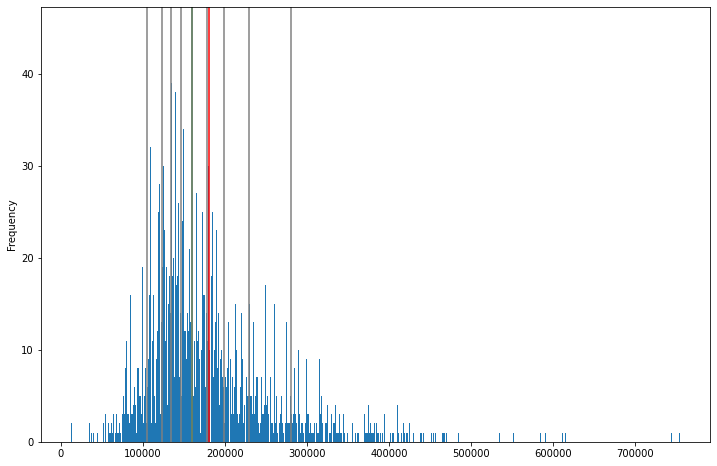

In [38]:
ax = df['SalePrice'].plot(kind='hist', bins=1000, figsize=(12,8))
ax.axvline(180796, color='red')
ax.axvline(160000.0, color='green')

for q in quantiles:
    ax.axvline(q, color='grey')


In [42]:
(df['SalePrice'] < 300000).mean()

91.87713310580205

<AxesSubplot:ylabel='Frequency'>

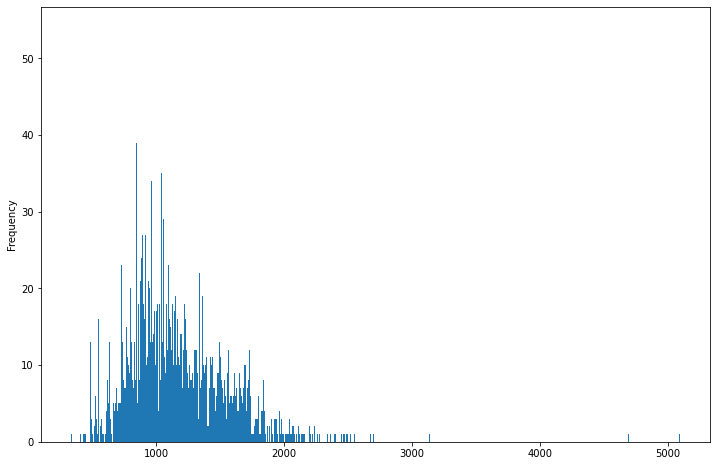

In [43]:
df['1st Flr SF'].plot(kind='hist', bins=1000, figsize=(12,8))

# 1st floor square feet versus sale price

- A decently linear relationship between these variables
- Some outlying low value, high SQFT properties. We hope that kitchen quality can explain these
- Some high value, low(ish) SQFT properties. We might need to include location or lot based fields to capture why these have higher value
- Not normally distributed with a heavy tail in both variables



<AxesSubplot:xlabel='SalePrice', ylabel='1st Flr SF'>

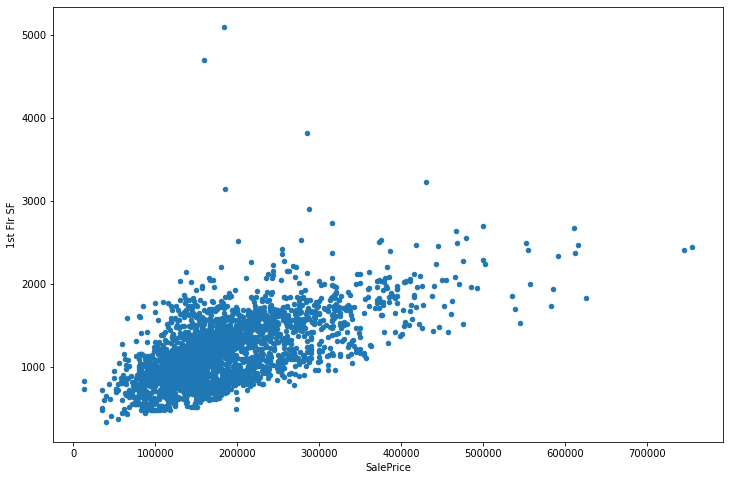

In [47]:
df[['1st Flr SF', 'SalePrice']].plot(kind='scatter', x='SalePrice', y='1st Flr SF', figsize=(12,8))

<AxesSubplot:ylabel='Frequency'>

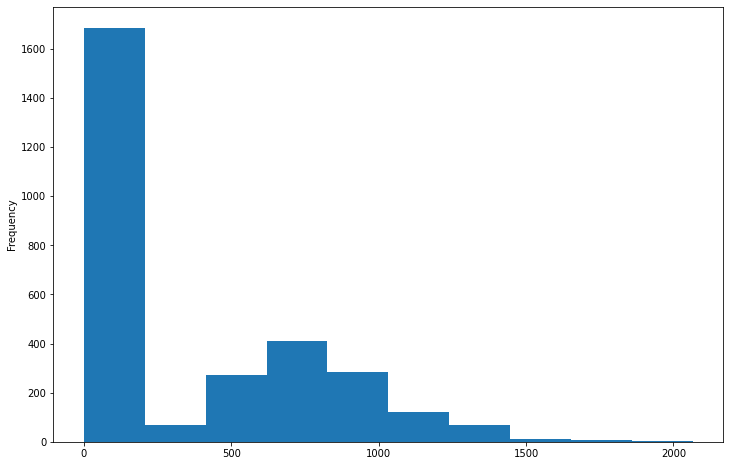

In [50]:
df['2nd Flr SF'].plot(kind='hist', bins=10, figsize=(12,8))

<AxesSubplot:xlabel='SalePrice', ylabel='2nd Flr SF'>

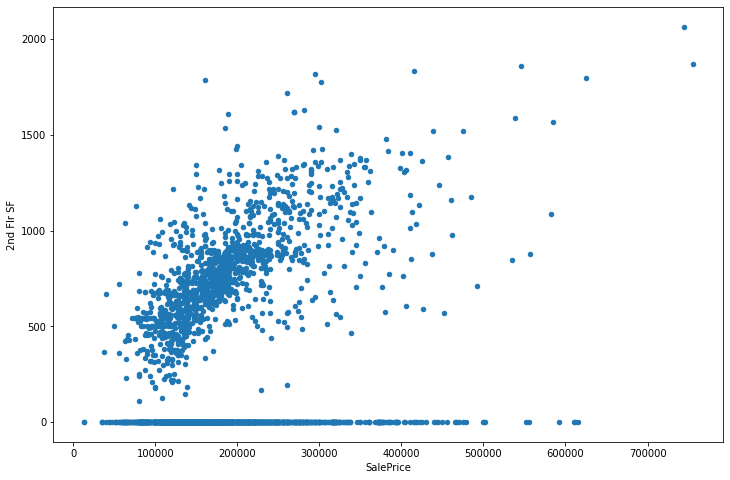

In [52]:
df[['2nd Flr SF', 'SalePrice']].plot(kind='scatter', x='SalePrice', y='2nd Flr SF', figsize=(12,8))